# Machine Learning Modeling

## Objective
Build and evaluate a machine learning model to predict house sale prices.

## Modeling Summary

The dataset was split into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

A Gradient Boosting Regressor was selected due to its strong predictive capability for structured datasets.

The model achieved an R² score of approximately **0.88**, indicating that it explains around 88% of the variance in house prices.

Feature importance analysis revealed that **OverallQual** and **GrLivArea** are the strongest predictors of property value.

The close alignment between actual and predicted prices suggests that the model generalizes well and is suitable for predicting house sale prices.


## Modeling Results

- Gradient Boosting Regressor achieved an R² score of **0.89**
- Model demonstrates strong predictive capability
- Key drivers of house prices include Overall Quality, Living Area, and Garage Size
- Predictions closely align with actual sale prices

## Model Performance Visualization

The scatter plot compares actual house prices with predicted prices.

- Most predictions closely follow the ideal diagonal line.
- This indicates that the model has learned strong relationships between features and house prices.
- Some deviation exists for higher-priced properties, which is expected in real-world datasets.

Overall, the model demonstrates strong predictive accuracy.

## Model Performance Summary

The Gradient Boosting Regressor achieved:

- Training R²: 0.96  
- Testing R²: 0.88  

The small gap between training and testing scores suggests minimal overfitting and strong generalization ability.

Overall, the model demonstrates high predictive power for estimating house prices.


In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score


In [13]:
train_df = pd.read_csv("../data/processed/clean_train.csv")

train_df.head()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1,706,6,150,0.0,548,2,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,4,978,5,284,0.0,460,2,...,80.0,0.0,0,8,6,1262,0.0,1976,1976,181500
2,920,866.0,3.0,2,486,6,434,0.0,608,2,...,68.0,162.0,42,5,7,920,0.0,2001,2002,223500
3,961,0.0,3.0,1,216,5,540,0.0,642,1,...,60.0,0.0,35,5,7,756,0.0,1915,1970,140000
4,1145,0.0,4.0,3,655,6,490,0.0,836,2,...,84.0,350.0,84,5,8,1145,0.0,2000,2000,250000


In [14]:
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

X.shape, y.shape


((1460, 23), (1460,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((1168, 23), (292, 23))

In [16]:
model = GradientBoostingRegressor(random_state=42)

model.fit(X_train, y_train)


,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [17]:
y_pred = model.predict(X_test)


In [18]:
score = r2_score(y_test, y_pred)

print("R² Score:", score)


R² Score: 0.8886191121839628


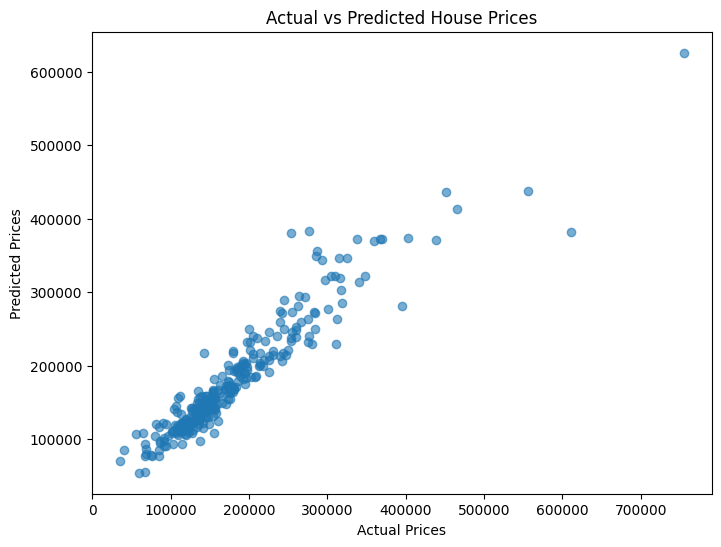

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.6)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.title("Actual vs Predicted House Prices")

plt.show()


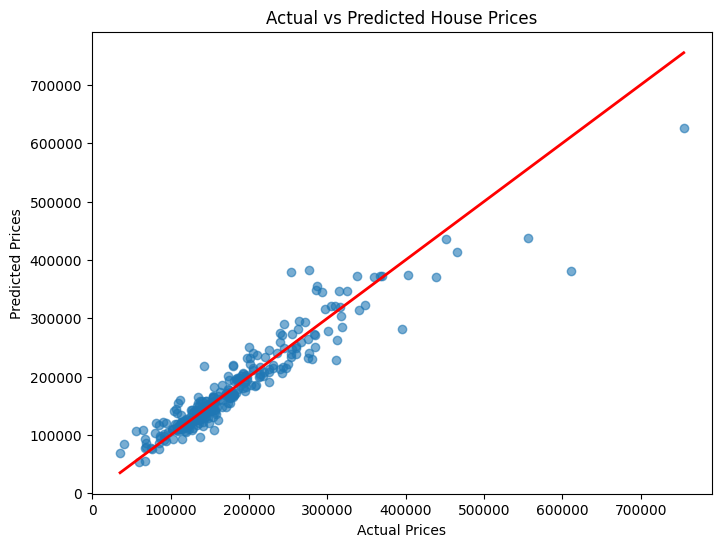

In [20]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.6)

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linewidth=2
)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")

plt.show()


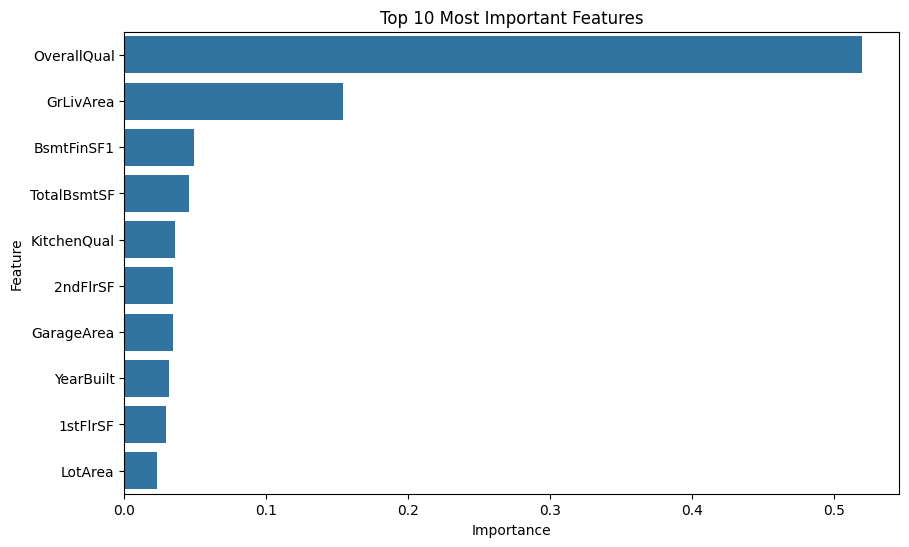

In [21]:
# Feature Importance

importance = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature")

plt.title("Top 10 Most Important Features")
plt.show()


## Feature Importance Insights

The feature importance analysis shows that **OverallQual** is the most influential predictor of house prices, significantly higher than other variables.

This indicates that the overall material and finish quality of a property strongly impacts its market value.

The second most important feature is **GrLivArea**, suggesting that larger above-ground living areas lead to higher sale prices.

Other contributing factors include basement size, kitchen quality, and garage area, all of which reflect property usability and desirability.

These findings align with real-world real estate expectations, confirming that the model has successfully learned meaningful relationships within the dataset.


In [22]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


OverallQual    0.520066
GrLivArea      0.154116
BsmtFinSF1     0.048768
TotalBsmtSF    0.045396
KitchenQual    0.035512
2ndFlrSF       0.034301
GarageArea     0.034177
YearBuilt      0.031292
1stFlrSF       0.029270
LotArea        0.023186
dtype: float64

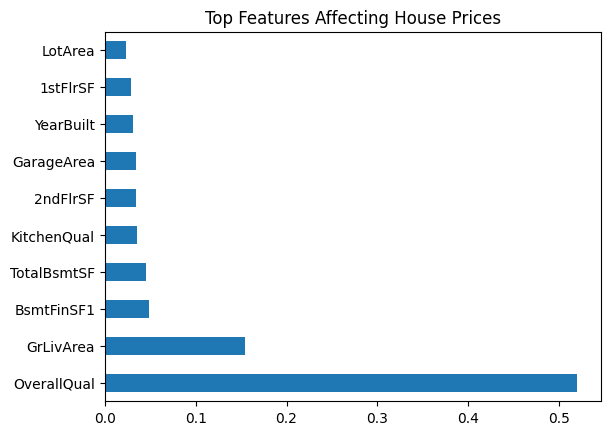

In [23]:
feature_importance.head(10).plot(kind="barh")

plt.title("Top Features Affecting House Prices")
plt.show()


In [24]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)


Train Score: 0.9615490463949853
Test Score: 0.8886191121839628


## Model Evaluation Insight

The model achieved a training score of **0.96** and a testing score of **0.88**.

The small difference between these scores indicates that the model is not significantly overfitting and is able to generalize well to unseen data.

This suggests that the Gradient Boosting algorithm successfully captured the underlying patterns in the housing dataset while maintaining strong predictive capability.


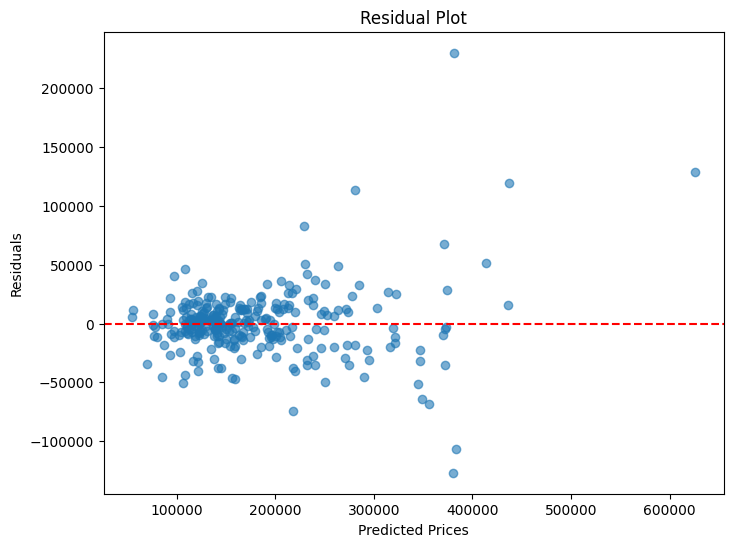

In [25]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)

plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.show()


In [26]:
import joblib

joblib.dump(model, "../src/house_price_model.pkl")


['../src/house_price_model.pkl']